## Observations and Insights 

Using the below figures and graphs, the following three observations were inferred when comparing Capomulin to nine additional drug regimens in the treatment of SCC tumors:

1) The final tumor volumes for each mouse treated with Capomulin are nearly half the mm3 size when compared to mice treated with Infubinol and Ceftain. The mice treated with Ramicane overall had slightly smaller average tumor volumes at the final timepoint but are still comparable to Capomulin. 
    
2) The final tumor volume for mouse i509 decreased by approximately 3.5 (mm3) from the initial timepoint to the final timepoint 45 days later: an 8% decrease overall. 

3) There is a strong positive correlation (r = 0.8) between weight and average tumor volume for the mice treated with Capomulin.


In [331]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

mouse_study_combined_df = pd.merge(mouse_metadata, study_results, how='outer', on="Mouse ID" )

# Display the data table for preview
mouse_study_combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [332]:
# Checking the number of mice.
mice_unique = len(mouse_study_combined_df['Mouse ID'].unique())
mice_unique

249

In [333]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

mice_duplicate = mouse_study_combined_df.groupby(['Mouse ID'])['Timepoint'].value_counts()
mice_duplicate[mice_duplicate>1]


Mouse ID  Timepoint
g989      0            2
          5            2
          10           2
          15           2
          20           2
Name: Timepoint, dtype: int64

In [334]:
# Optional: Get all the data for the duplicate mouse ID. 

g989_df = mouse_study_combined_df.loc[mouse_study_combined_df['Mouse ID'] == 'g989']
g989_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [335]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

mice_cleaned_df = mouse_study_combined_df.loc[mouse_study_combined_df['Mouse ID'] != "g989"]
mice_cleaned_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [336]:
# Checking the number of mice in the clean DataFrame.

mice_count = mice_cleaned_df.groupby('Mouse ID')
mice_cleaned_count = len(mice_count['Mouse ID'].unique())
mice_cleaned_count

248

## Summary Statistics

In [337]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

drug_tumor = mice_cleaned_df[['Drug Regimen', 'Tumor Volume (mm3)']].groupby(['Drug Regimen'])
mean = drug_tumor['Tumor Volume (mm3)'].mean()
median = drug_tumor['Tumor Volume (mm3)'].median()
variance = drug_tumor['Tumor Volume (mm3)'].var()
std_dev = drug_tumor['Tumor Volume (mm3)'].std()
sem = drug_tumor['Tumor Volume (mm3)'].sem()

stats_tumor_volume_df = pd.DataFrame({'Tumor Volume (mm3) Mean': mean,
                                     'Tumor Volume (mm3) Median': median,
                                     'Tumor Volume (mm3) Variance': variance,
                                     'Tumor Volume (mm3) Standard Deviation': std_dev,
                                     'Tumor Volume (mm3) SEM': sem})
stats_tumor_volume_df

,Tumor Volume (mm3) Mean,Tumor Volume (mm3) Median,Tumor Volume (mm3) Variance,Tumor Volume (mm3) Standard Deviation,Tumor Volume (mm3) SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [338]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
# Cite: https://pandas.pydata.org/docs/getting_started/intro_tutorials/06_calculate_statistics.html

stats_groupby_df = mice_cleaned_df[['Drug Regimen', 'Tumor Volume (mm3)']].groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})
stats_groupby_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

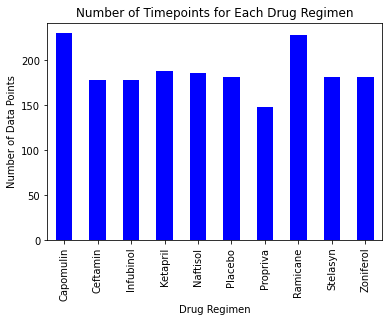

<Figure size 432x288 with 0 Axes>

In [339]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

mice_drug_group = mice_cleaned_df[['Drug Regimen', 'Mouse ID']].groupby('Drug Regimen')['Mouse ID'].count()

mice_treatment_bar = mice_drug_group.plot(kind='bar', color = 'b')

# Set the xlabel and ylabel using class methods
mice_treatment_bar.set_xlabel("Drug Regimen")
mice_treatment_bar.set_ylabel("Number of Data Points")
mice_treatment_bar.set_title("Number of Timepoints for Each Drug Regimen")

plt.show()
plt.tight_layout()


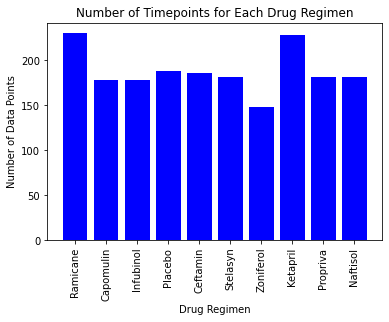

In [340]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

mice_drugs = mice_cleaned_df['Drug Regimen'].unique()
treatments = mice_cleaned_df[['Drug Regimen', 'Mouse ID']].groupby('Drug Regimen')['Mouse ID'].count()

plt.bar(mice_drugs, treatments, color='b', alpha=1, align="center")
plt.xticks(rotation = '90')
plt.title("Number of Timepoints for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.show()

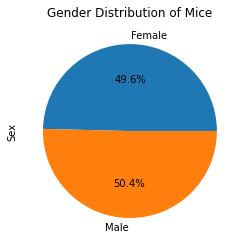

In [341]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

mice_gender_df = mice_cleaned_df[['Mouse ID','Sex']].drop_duplicates(subset=['Mouse ID']).groupby('Sex').count()
pie_chart_pandas = mice_gender_df.plot.pie(y= 'Mouse ID', autopct='%1.1f%%', legend=False)
pie_chart_pandas.set_ylabel('Sex')
pie_chart_pandas.set_title('Gender Distribution of Mice')
plt.show()

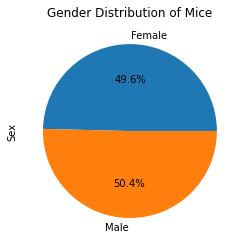

In [342]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(mice_gender_df['Mouse ID'], labels = mice_gender_df.index, autopct='%1.1f%%')
plt.ylabel('Sex')
plt.title('Gender Distribution of Mice')
plt.show()


## Quartiles, Outliers and Boxplots

In [343]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

max_time = mice_cleaned_df.groupby('Mouse ID')['Timepoint'].max().reset_index()
final_time_df = pd.DataFrame(max_time, columns=['Mouse ID', 'Timepoint'])

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

final_tumor_df = pd.merge(final_time_df, mice_cleaned_df, on=['Mouse ID', 'Timepoint'])
final_volume_df = final_tumor_df[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Drug Regimen']]
final_volume_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Drug Regimen
0,a203,45,67.973419,Infubinol
1,a251,45,65.525743,Infubinol
2,a262,45,70.717621,Placebo
3,a275,45,62.999356,Ceftamin
4,a366,30,63.440686,Stelasyn


In [344]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting) 

tumor_vol_list = []
    
# Calculate the IQR and quantitatively determine if there are any potential outliers.   

    # Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:
    final_tumor_volume = final_volume_df.loc[final_volume_df['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    tumor_vol_list.append(final_tumor_volume)  

    # Determine outliers using upper and lower bounds
    quartiles =  final_tumor_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]

    iqr = upperq - lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    outliers = final_tumor_volume.loc[(final_tumor_volume < lower_bound) | (final_tumor_volume > upper_bound)]
   
    print(f"{treatment} has outliers: {outliers}")


Capomulin has outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane has outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol has outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin has outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


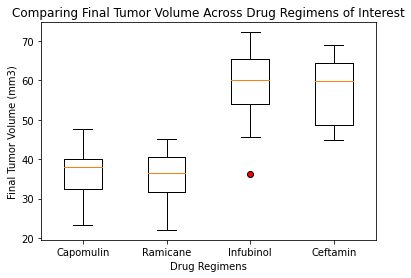

In [345]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

red_circle = dict(markerfacecolor='r')
fig1, ax1 = plt.subplots()

ax1.boxplot(tumor_vol_list, labels = treatments, flierprops=red_circle)
ax1.set_xlabel('Drug Regimens')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_title('Comparing Final Tumor Volume Across Drug Regimens of Interest')

plt.show()

## Line and Scatter Plots

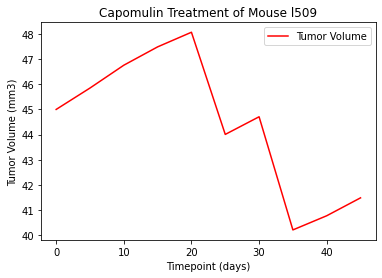

In [346]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

capomulin_list = mice_cleaned_df.loc[mice_cleaned_df['Drug Regimen'] == 'Capomulin']['Mouse ID'].unique()

mouse_l509_df = mice_cleaned_df.loc[mice_cleaned_df['Mouse ID'] == 'l509']
timepoint = mouse_l509['Timepoint']
tumor = mouse_l509['Tumor Volume (mm3)']

plt.plot(timepoint, tumor, color='red', label='Tumor Volume')
plt.legend(loc='best')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin Treatment of Mouse l509')
plt.show()


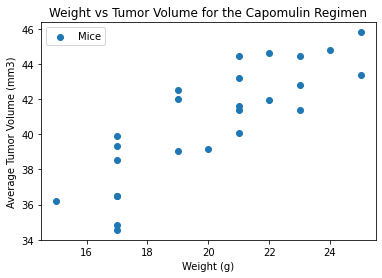

In [347]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

capomulin_df = mice_cleaned_df.loc[mice_cleaned_df['Drug Regimen'] == 'Capomulin'].groupby('Mouse ID').mean()

weight = capomulin_df['Weight (g)']
tumor = capomulin_df['Tumor Volume (mm3)']

plt.scatter(weight, tumor, label='Mice')
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for the Capomulin Regimen")
plt.legend(loc='best')
plt.show()

## Correlation and Regression

The correlation between weight and tumor volume for Capomulin is 0.84


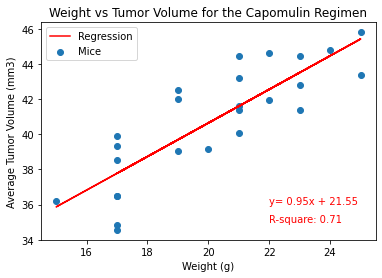

In [348]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(weight,tumor)[0]
print(f"The correlation between weight and tumor volume for Capomulin is {round(correlation,2)}")
slope, intercept, rvalue, pvalue, std_err = st.linregress(weight, tumor)

p_value = slope * weight + intercept

weight = capomulin_df['Weight (g)']
tumor = capomulin_df['Tumor Volume (mm3)']
r_squared = correlation ** 2

plt.scatter(weight, tumor, label='Mice')
plt.plot(weight, p_value, color='red', label='Regression')
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for the Capomulin Regimen")
plt.legend(loc='best')
line_eq = f'y= {round(slope,2)}x + {round(intercept,2)}'
plt.annotate(line_eq, (22, 36), color='r', fontsize=10)
plt.annotate(f'R-square: {round(r_squared, 2)}', (22, 35), color='r', fontsize=10)
plt.show()

